In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
my_data= pd.read_csv("/content/HR_capstone_dataset.csv")
my_data.dropna(inplace=True)
my_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
my_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
my_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
col=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary']

In [ ]:
plt.style.use('dark_background')

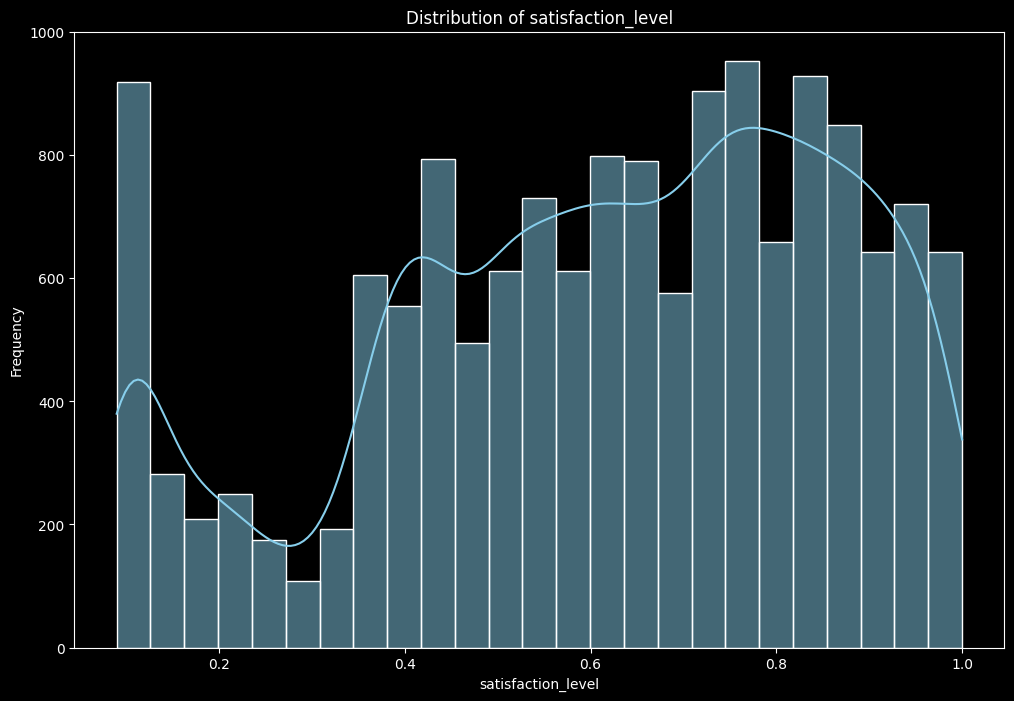

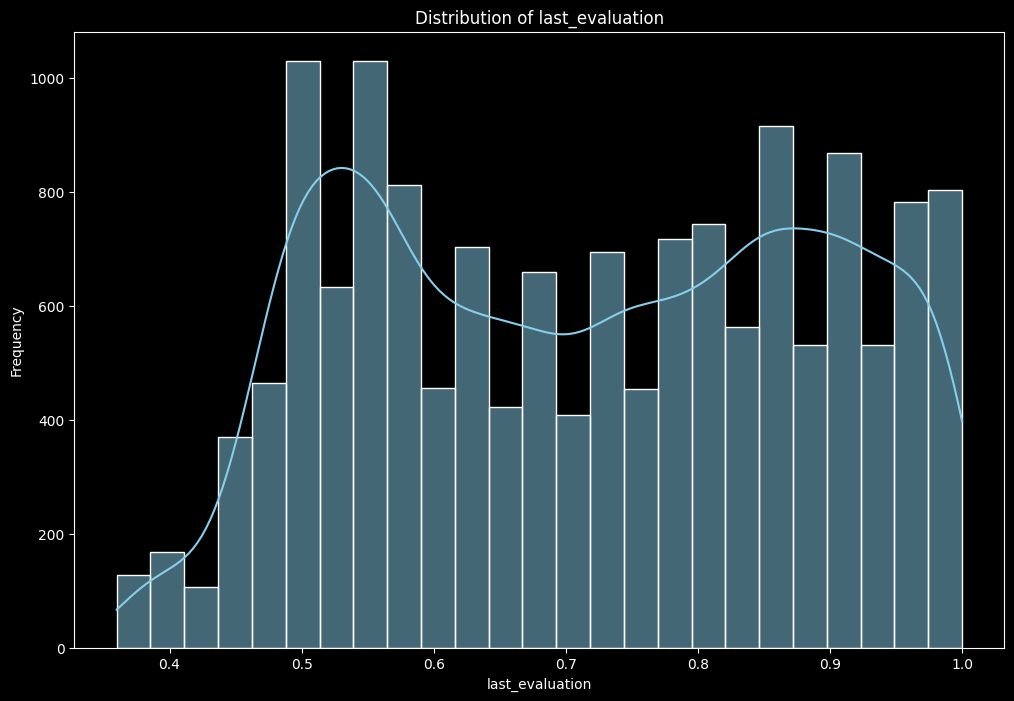

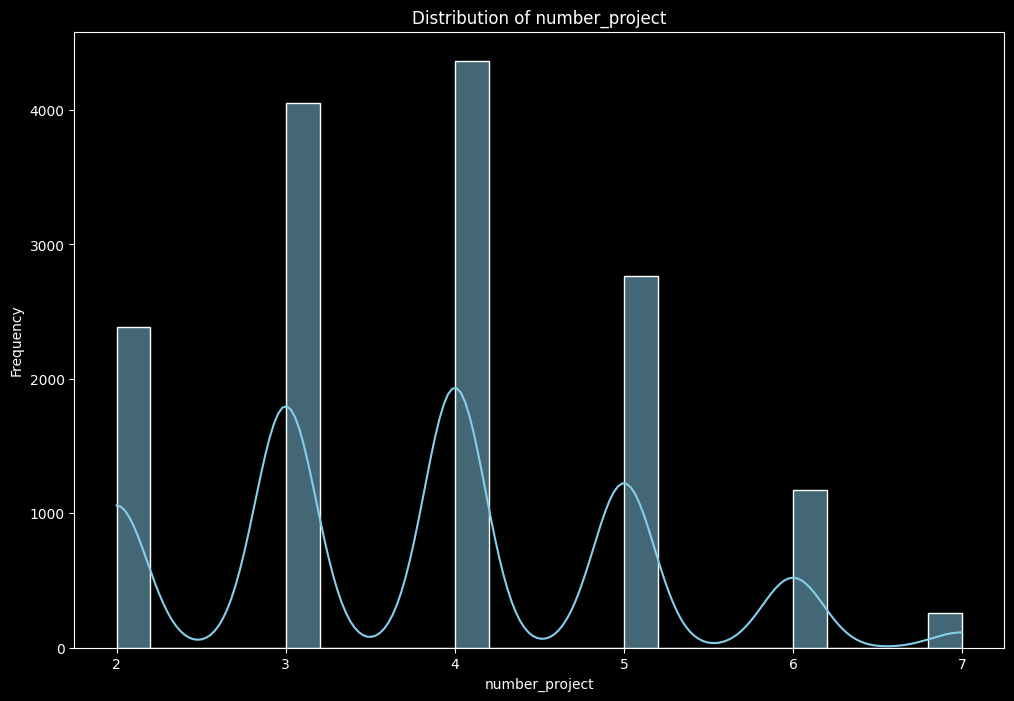

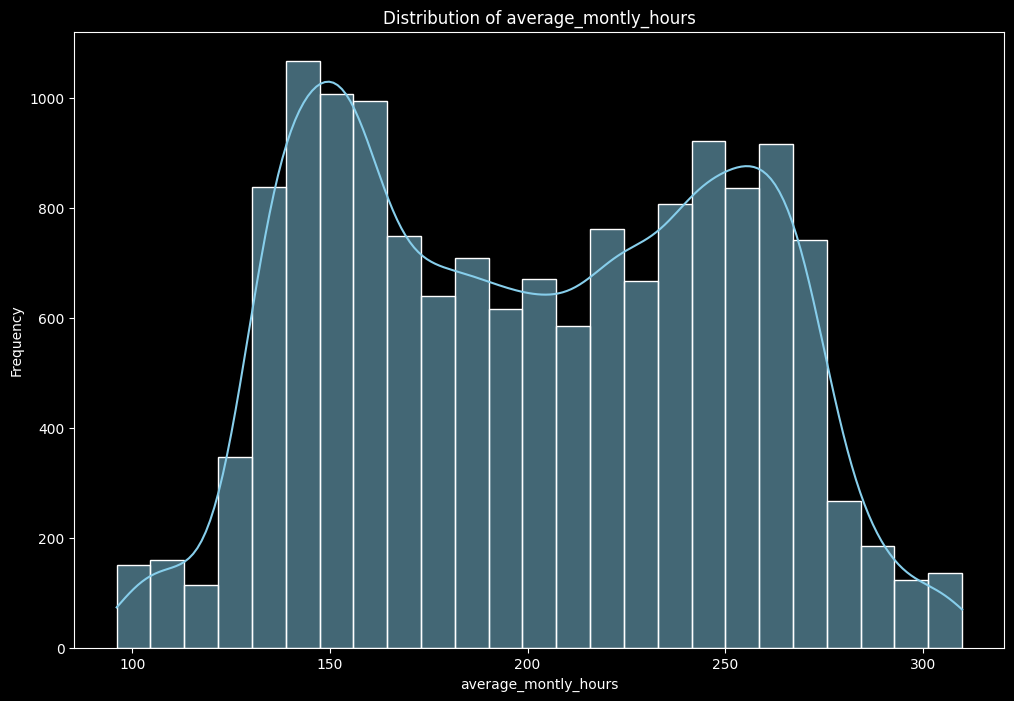

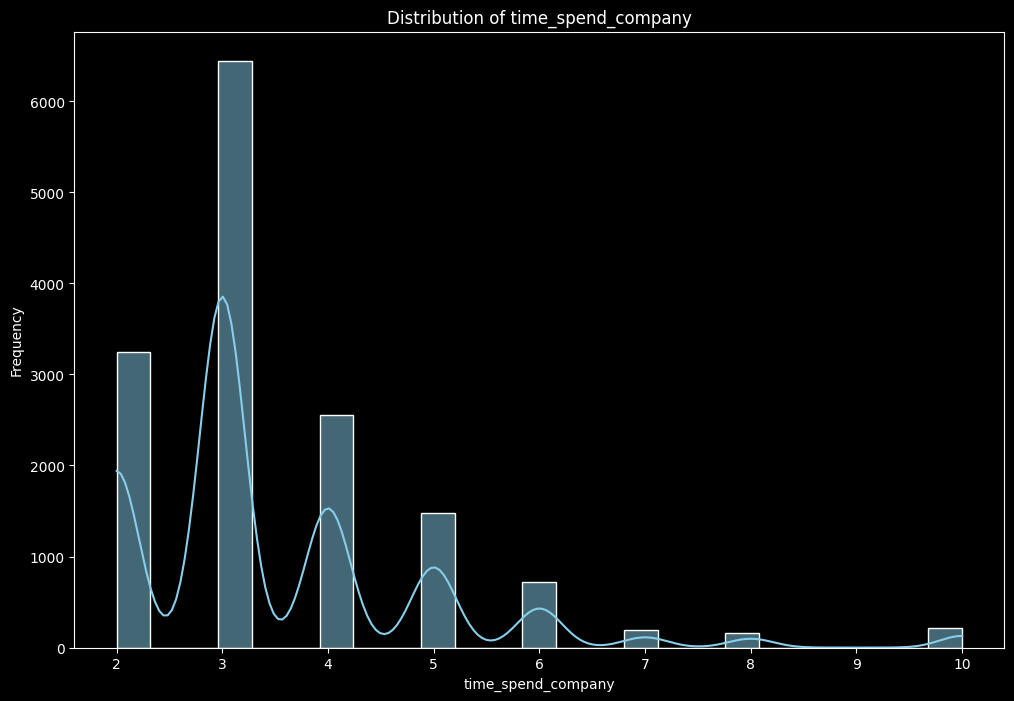

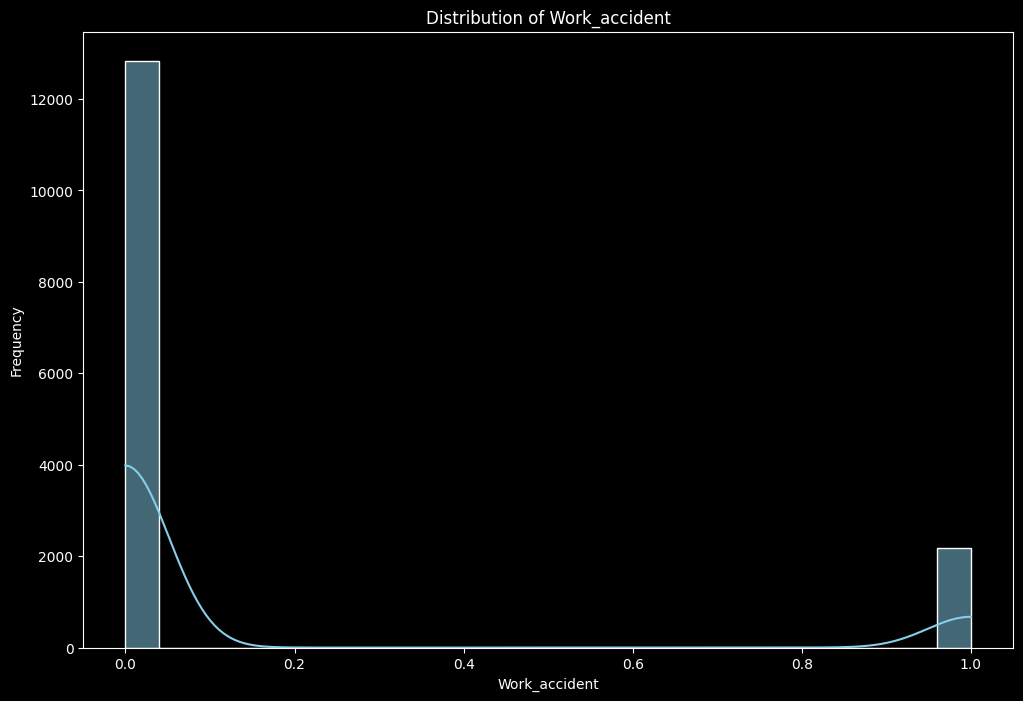

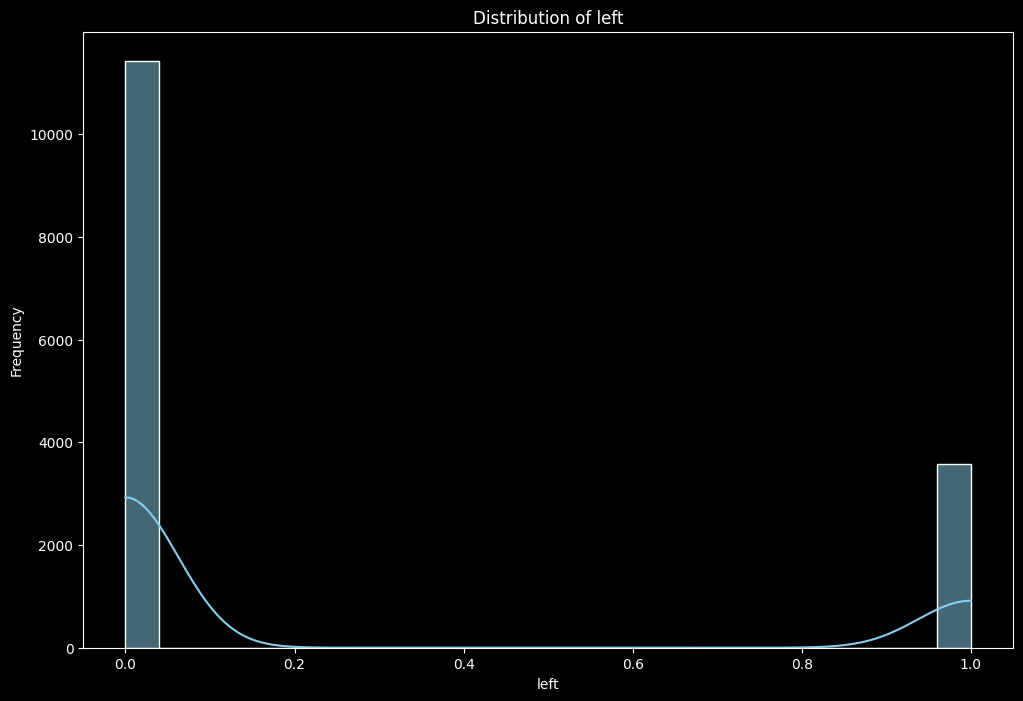

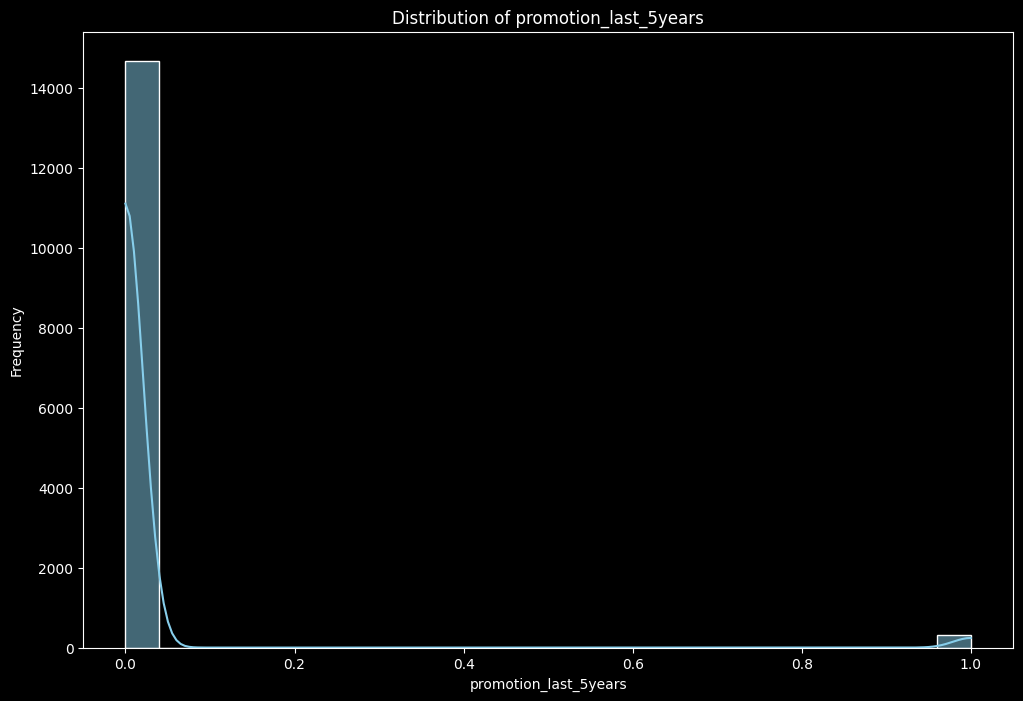

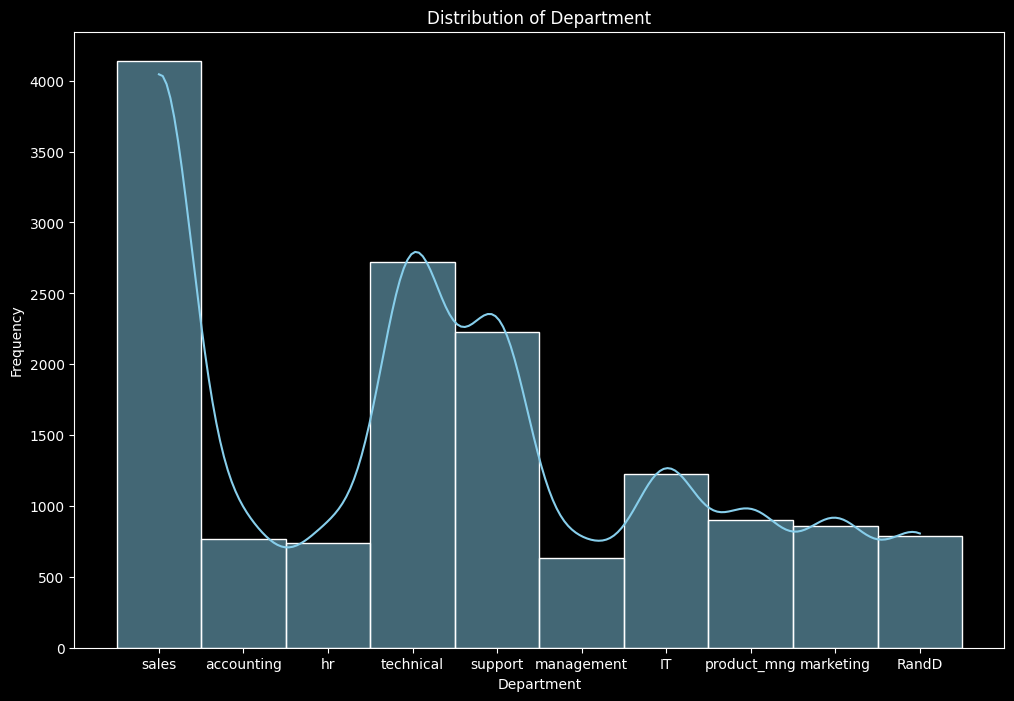

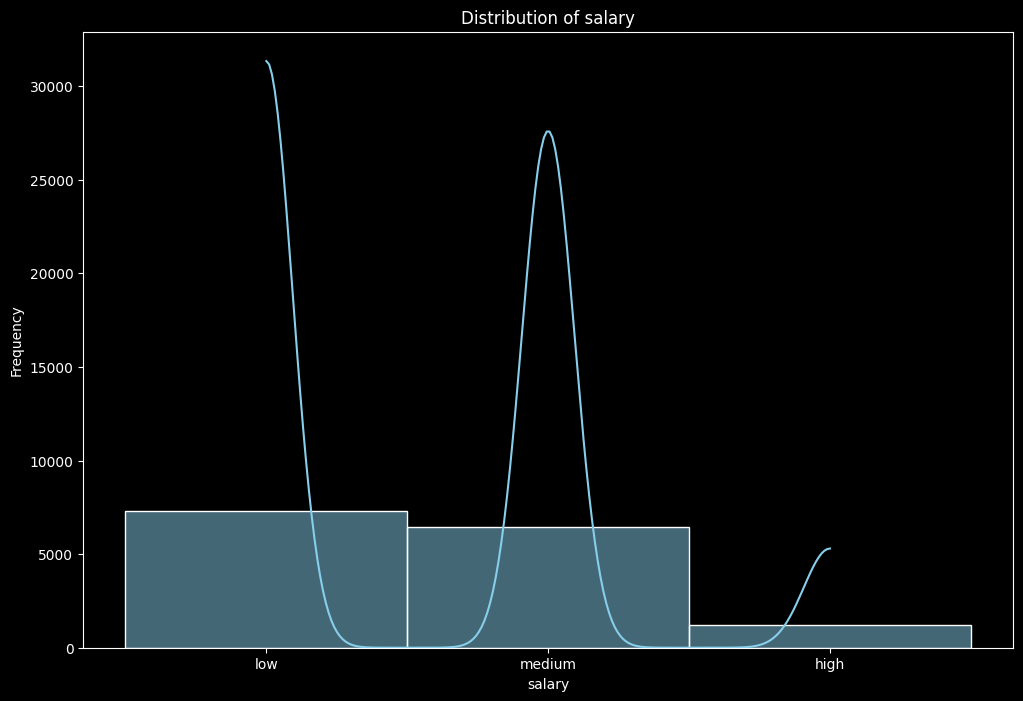

In [ ]:
# Distribution analysis
for var in col:
 plt.figure(figsize=(12, 8))
 sns.histplot(my_data[var], bins=25, kde=True,color='skyblue')
 plt.title(f'Distribution of {var}')
 plt.xlabel(var)
 plt.ylabel('Frequency')
 plt.show()

<Figure size 2000x1000 with 0 Axes>

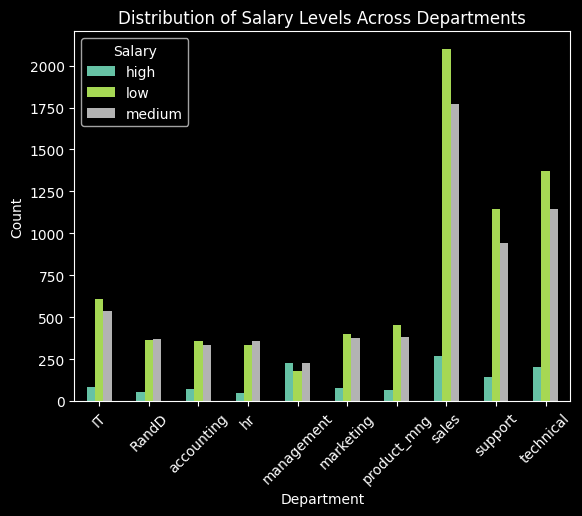

In [ ]:
grouped_data = my_data.groupby(['Department', 'salary']).size().unstack()
# Plot the grouped bar plot
plt.figure(figsize=(20, 10))
grouped_data.plot(kind='bar', cmap='Set2')
plt.title('Distribution of Salary Levels Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary')
plt.show()

<Figure size 1000x600 with 0 Axes>

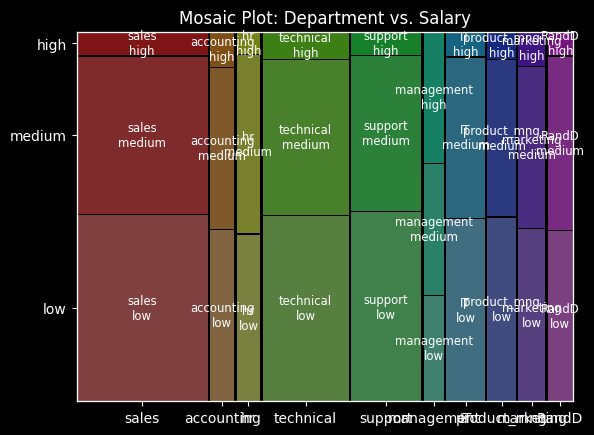

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
plt.figure(figsize=(10, 6))
mosaic(my_data, ['Department', 'salary'], title='Mosaic Plot: Department vs. Salary')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
Lbl=LabelEncoder()
my_data["Department"]=Lbl.fit_transform(my_data["Department"])
my_data["salary"]=Lbl.fit_transform(my_data["salary"])

In [ ]:
# Categorical variable analysis with Plotly Express
categorical_vars = ['Department', 'salary']
for var in categorical_vars:
    fig = px.histogram(my_data, x=var, title=f'Distribution of {var}', labels={'value': 'Count'})
    fig.show()

In [ ]:
# Correlation analysis with Plotly Express
correlation_matrix =my_data.corr()
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                title="Correlation Matrix")
fig.update_layout(height=800, width=800)
fig.show()

In [ ]:
# Interactive visualization with Plotly
fig = px.scatter(my_data, x='satisfaction_level', y='average_montly_hours', color='left', title='Satisfaction vs. Monthly Hours')
fig.show()

In [ ]:
X, y = my_data.drop(['left'], axis = 1), my_data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = 42, shuffle =True)

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.9911111111111112
RandomForestClassifierModel features importances are :  [0.34041803 0.12475776 0.18897406 0.14306176 0.17693966 0.00497558
 0.00070327 0.01240783 0.00776205]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0 0 0 ... 1 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1379
           1       0.99      0.97      0.98       421

    accuracy                           0.99      1800
   macro avg       0.99      0.98      0.99      1800
weighted avg       0.99      0.99      0.99      1800

[[1375    4]
 [  12  409]]
Confusion Matrix is : 
 [[1375    4]
 [  12  409]]


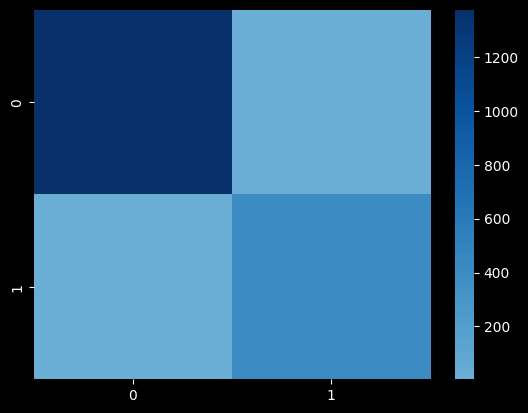

accuracy: 0.9911111111111112


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Applying RandomForestClassifier Model
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=80,random_state=33) #criterion can be also : entropy
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')
#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred)
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred)
#----------------------------------------------------
prediction=RandomForestClassifierModel.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues', fmt="d")
plt.show()
print("accuracy:",metrics.accuracy_score(y_test,prediction))